In [180]:
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import json
import numpy as np

### Functions

In [6]:
def extract_value_from_dict(df, colname, val_pos):
    df_temp = pd.json_normalize(df[colname])
    df_temp = df_temp.applymap(lambda x: list(x.values())[val_pos] if isinstance(x, dict) else x)
    df_temp.columns = [f"{colname}_{x}" for x in df_temp.columns]
    df = df.drop(colname, axis=1)
    return pd.concat([df, df_temp], axis=1)

In [20]:
def extract_values(series, key):
    def extract(row):
        values = []
        for d in row:
            if key in d:
                values.append(d[key])
        return values
    return series.apply(extract)

# Loading data

In [134]:
with open('./../data/dumps/maldita.json', 'r') as f:
    json_iberifier = json.load(f)
df_iberifier = pd.json_normalize(json_iberifier)
df_iberifier['formats'] = extract_values(df_iberifier['formats'], 'name')
df_iberifier['sources'] = extract_values(df_iberifier['sources'], 'name')
df_iberifier['categories'] = extract_values(df_iberifier['categories'], 'name')

# Drop unused columns
to_drop = ['organization.id', 'debunkContent', 'media', 'keywords', 'organizationCalification.calification.id']
for col in to_drop:
    df_iberifier = df_iberifier.drop(col, axis=1)
    
# Rename some columns for easy viz

rename_cols = {'_id.$oid': 'fact_id', 
               'type.name': 'type',
               'organization.name': 'fact-checker',
               'organizationCalification.calification.explanation': 'explanation', 
               'organizationCalification.calification.name': 'veracity',
               'date.$date': 'date'}
df_iberifier = df_iberifier.rename(columns=rename_cols)

# Convert datetime object
df_iberifier['date'] = df_iberifier['date'].astype('datetime64[ns]') 

df_iberifier.head(1)

text  \
0  No, esta agresi칩n a un m칠dico que atiende a un...   

                                             content  formats  \
0  Espa침a, cada vez m치s frecuentes los ataques a ...  [V칤deo]   

                   createdAt              sources  \
0  2023-03-08T09:11:42+01:00  [WhatsApp, Twitter]   

                                          categories  \
0  [Migraci칩n/Migra칞ao - Racismo, Religi칩n / Reli...   

                                                link  \
0  https://maldita.es/malditobulo/20230308/agresi...   

                    fact_id            type fact-checker veracity  \
0  6409218c5966ae90e851a389  Otros / Outros   Maldita.es    Falso   

                                         explanation                date  
0  Se ha contrastado de forma independiente que e... 2023-03-08 08:11:42

In [54]:
with open('./../data/dumps/tweets.json', 'r') as f:
    json_tweets = json.load(f)
df_tweets = pd.json_normalize(json_tweets)
df_tweets['fact_id'] = extract_values(df_tweets['fact_id'], '$oid')

# Drop unused columns
to_drop = ['tweet.in_reply_to_user.withheld.scope', 'tweet.withheld.scope', 'tweet.attachments.poll_ids', 'tweet.author.withheld.scope']
for col in to_drop:
    df_tweets = df_tweets.drop(col, axis=1)

# Rename some columns for easy viz

rename_cols = {'_id.$oid': 'db_id', 
               'date.$date': 'date', 
               'tweet.public_metrics.retweet_count': 'retweet_count',
               'tweet.public_metrics.like_count': 'like_count',
               'tweet.public_metrics.quote_count': 'quote_count',
               'tweet.public_metrics.impression_count': 'impression_count'
              }

df_tweets = df_tweets.rename(columns=rename_cols)

# Convert datetime object
df_tweets['date'] = df_tweets['date'].astype('datetime64[ns]') 

df_tweets.head(1)

tweet_id                     fact_id  \
0  1631080654195572736  [6409218c5966ae90e851a389]   

                                                text  \
0  @wallstwolverine No s칠, aqu칤 hay mitad y mitad...   

                      db_id                date  retweet_count  \
0  6413ae166fa02fd2fb322358 2023-03-01 23:55:06              0   

   tweet.public_metrics.reply_count  like_count  quote_count  \
0                                 0           0            0   

   impression_count  ... tweet.in_reply_to_user.username  \
0                50  ...                             NaN   

  tweet.in_reply_to_user.location tweet.in_reply_to_user.id  \
0                             NaN                       NaN   

  tweet.in_reply_to_user.name tweet.attachments.media_keys  \
0                         NaN                          NaN   

  tweet.attachments.media tweet.withheld.copyright  \
0                     NaN                      NaN   

  tweet.withheld.country_codes tweet.author.withheld.country_codes  \
0                          NaN                                 NaN   

  tweet.in_reply_to_user.withheld.country_codes  
0                                           NaN  

[1 rows x 35 columns]

In [61]:
with open('./../data/dumps/mynews.json', 'r') as f:
    json_mynews = json.load(f)
df_mynews = pd.json_normalize(json_mynews)


# Rename some columns for easy viz

rename_cols = {'_id.$oid': 'db_id', 
               'date.$date': 'date', 
               'fact_id.$oid': 'fact_id'
              }

df_mynews = df_mynews.rename(columns=rename_cols)

# Convert datetime object
df_mynews['date'] = df_mynews['date'].astype('datetime64[ns]') 

df_mynews.head(1)

IdDocument  \
0  00001416-20230302-000323   

                                               Title             Section  \
0  TOM  BJOERKLUND   Dise침ar una construcci칩n par...  MISCELANEA CIENCIA   

         Date Author           Newspaper Subtitle   Page  \
0  02/03/2023         El Mundo Andaluc칤a           AA043   

                                             Content   GeneralReference  ...  \
0  [2651 Caracteres]TOM  BJOERKLUND "Dise침ar una ...  El Mundo 02-03-23  ...   

                           Groups Diffusion       Value Audience  \
0  [[52], [37], [35], [17], [13]]    5807.0  883.993423  90000.0   

                    Logo   Ref  query_output                     db_id  \
0  /media/logos/EMA1.gif  1416          2765  6413ae8bde7d0add923cb1df   

                    fact_id       date  
0  6409218c5966ae90e851a389 2023-03-02  

[1 rows x 23 columns]

## Time period

In [62]:
print(f" First day for Maldita: {min(df_iberifier['date'])}")
print(f" Last day for Maldita: {max(df_iberifier['date'])}")
print(f" Lenght period for Maldita: {max(df_iberifier['date']) - min(df_iberifier['date']) }")

 First day for Maldita: 2023-03-08 08:11:42
 Last day for Maldita: 2023-04-05 15:28:33
 Lenght period for Maldita: 28 days 07:16:51


In [63]:
print(f" First day for Twitter: {min(df_tweets['date'])}")
print(f" Last day for Twitter: {max(df_tweets['date'])}")
print(f" Lenght period for Twitter: {max(df_tweets['date']) - min(df_tweets['date']) }")

 First day for Twitter: 2023-03-01 00:05:45
 Last day for Twitter: 2023-04-12 23:57:19
 Lenght period for Twitter: 42 days 23:51:34


In [64]:
print(f" First day for MyNews: {min(df_mynews['date'])}")
print(f" Last day for MyNews: {max(df_mynews['date'])}")
print(f" Lenght period for MyNews: {max(df_mynews['date']) - min(df_mynews['date']) }")

 First day for MyNews: 2023-03-02 00:00:00
 Last day for MyNews: 2023-04-12 00:00:00
 Lenght period for MyNews: 41 days 00:00:00


## Per claims

In [90]:
# Tweets
# Need to explode the list in fact_id before groupby
df_exploded = df_tweets.explode('fact_id')
tweets_grouped = df_exploded.groupby('fact_id').size()#.mean()
#sns.violinplot(data=tweets_grouped, inner='points', cut=0)

# For mynews
mynews_grouped = df_mynews.groupby('fact_id').size()
mynews_grouped

# Concat
count_per_claim = pd.concat([tweets_grouped, mynews_grouped], axis=1, keys=['count_tweets', 'count_articles']).reset_index()
count_per_claim = count_per_claim.fillna(0)
count_per_claim['count_tweets'] = count_per_claim['count_tweets'].astype('int') 
count_per_claim['count_articles'] = count_per_claim['count_articles'].astype('int') 
count_per_claim

fact_id
6409218c5966ae90e851a389    134
640bc48c12b81f6047a2e4e1     93
640bc48c12b81f6047a2e4e2    130
640bc48c12b81f6047a2e4e3    137
640bc48c12b81f6047a2e4e4    113
                           ... 
642e0b8cf510dcaa70adbe3c    140
642e0b8cf510dcaa70adbe3d    107
642e0b8cf510dcaa70adbe3e    139
642e0b8cf510dcaa70adbe40    136
642e0b8cf510dcaa70adbe42    131
Length: 92, dtype: int64

<AxesSubplot: ylabel='Count'>

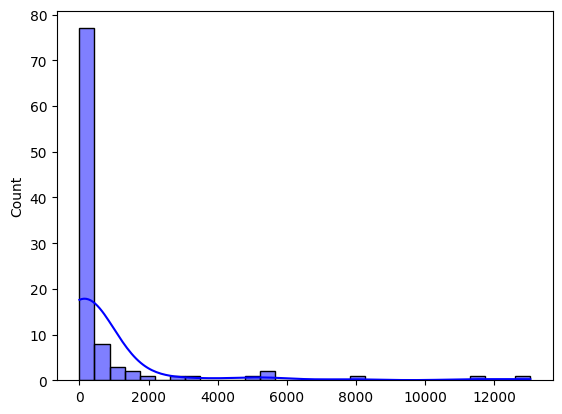

In [111]:
sns.histplot(tweets_grouped, kde=True, color='blue', bins=30)

<AxesSubplot: ylabel='Count'>

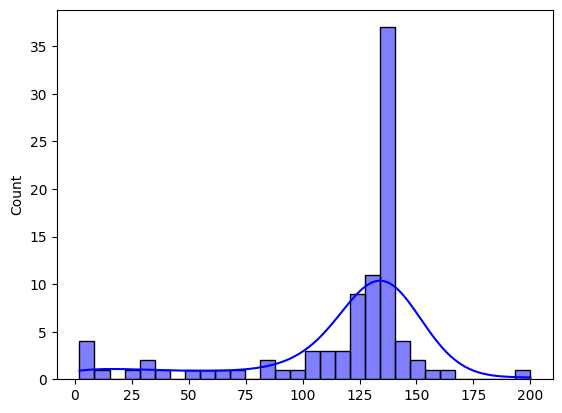

In [112]:
sns.histplot(mynews_grouped, kde=True, color='blue', bins=30)

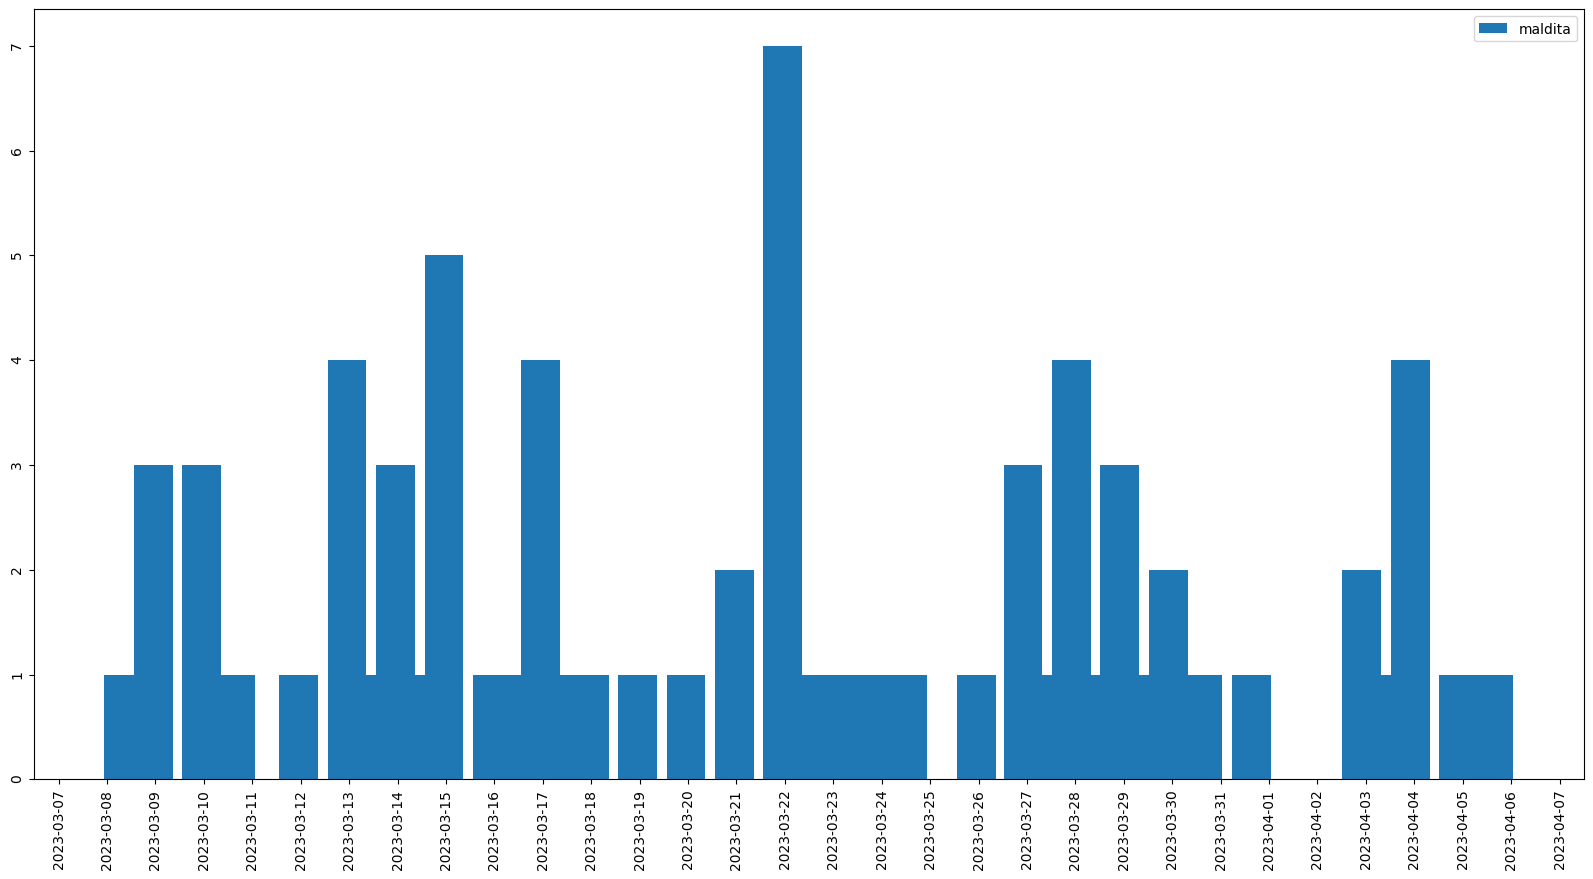

In [121]:
iberifier_dates = df_iberifier.groupby(df_iberifier['date']).size()
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(iberifier_dates.index, iberifier_dates.values, label='maldita')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
ax.legend()
plt.show()

In [ ]:
tweets = df_tweets.groupby(df_tweets['date'])['count'].sum()
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot_date(tweets.index, tweets.values, '--')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
plt.show()

In [ ]:
mynews = df_mynews.groupby(df_mynews['date'])['count'].sum()
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot_date(mynews.index, mynews.values, '--')
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
plt.show()

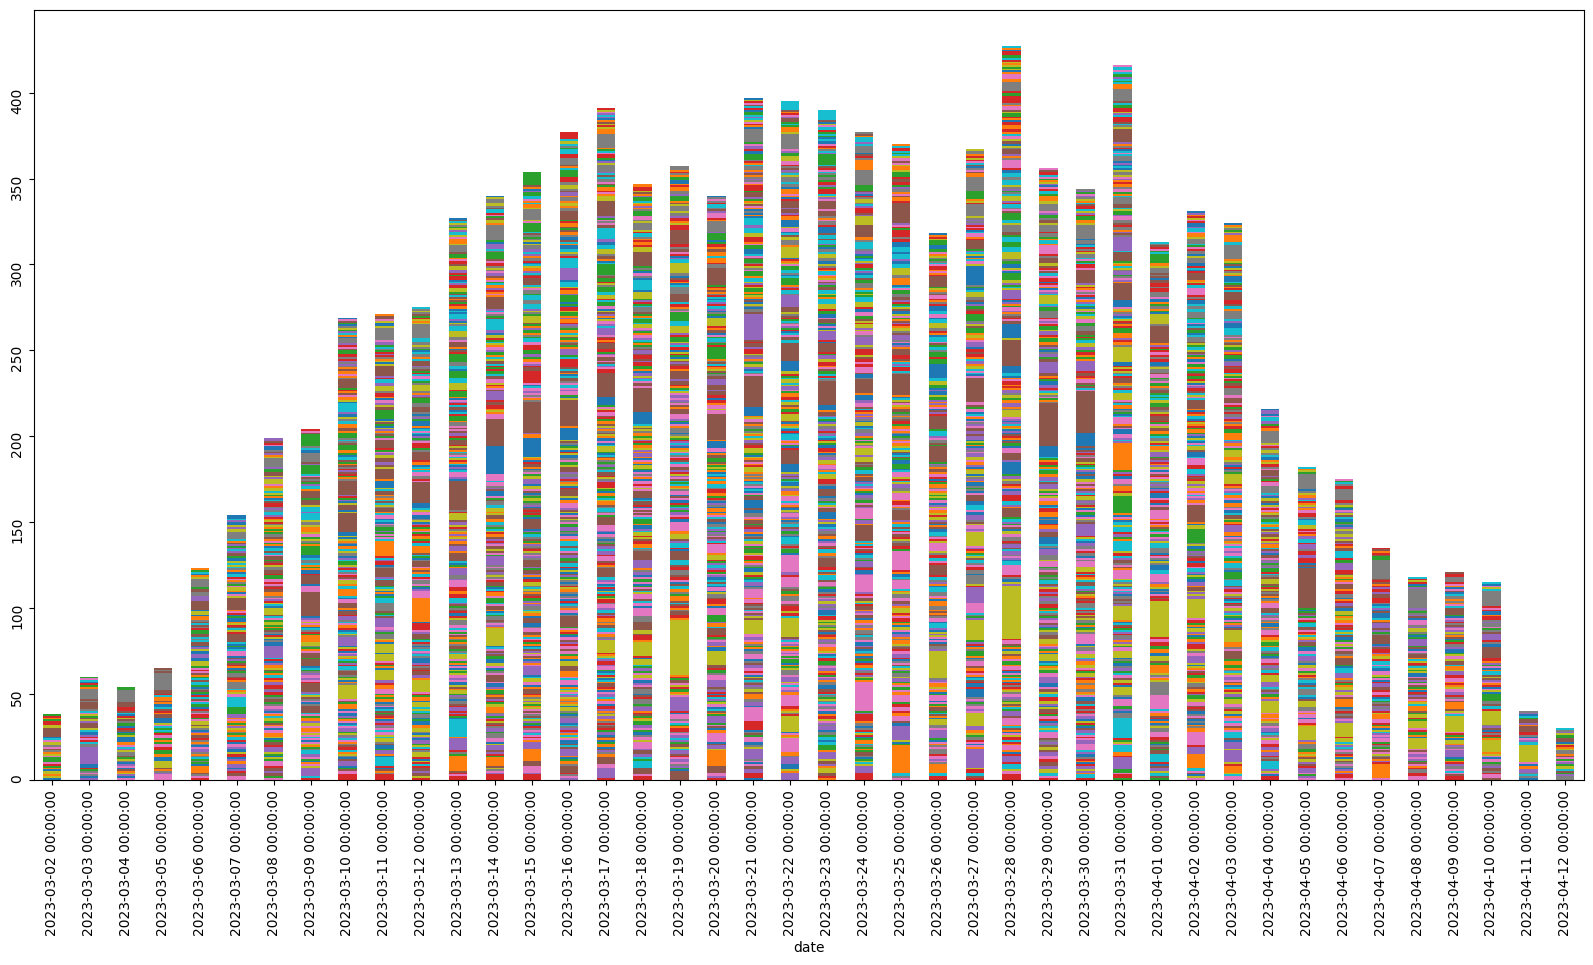

In [124]:
fig, ax = plt.subplots(figsize=(20, 10))
df_mynews.groupby([df_mynews['date'], df_mynews['Newspaper']]).size().unstack().plot.bar(stacked=True, 
                                                                                                 ax=ax, legend=False)
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.tick_params(rotation=90)
plt.show()

## Newspaper parsed

In [67]:
unique_newspapers = df_mynews['Newspaper'].unique().size
unique_newspapers

2142

<AxesSubplot: >

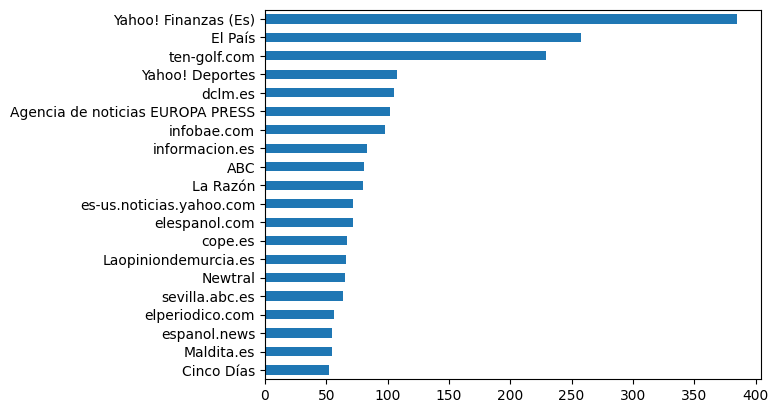

In [98]:
df_mynews['Newspaper'].value_counts(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh')

/home/olivier/.cache/pypoetry/virtualenvs/iberifier-KmB0-QDJ-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/olivier/.cache/pypoetry/virtualenvs/iberifier-KmB0-QDJ-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/olivier/.cache/pypoetry/virtualenvs/iberifier-KmB0-QDJ-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


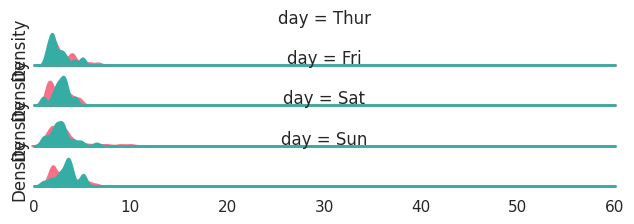

In [145]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

# Impact of fact check

In [181]:
# Explode tweets on fact_id list
tweets_exploded = df_tweets.explode('fact_id')
tweets_exploded

# Merge the iberifier onto the tweets based on the fact_id
tweets_iberifier = pd.merge(tweets_exploded, df_iberifier[['date', 'sources', 'fact_id', 'categories', 'type', 'fact-checker', 'veracity']], on='fact_id', how='left')

# Rename the date to avoid confusion
tweets_iberifier = tweets_iberifier.rename(columns={'date_x': 'date_tweet', 'date_y': 'date_fact_check'})

# Calculate the difference in time between the time the tweet is published and the fact-check
tweets_iberifier['diff_date'] = (tweets_iberifier['date_tweet'] - tweets_iberifier['date_fact_check']).dt.days
tweets_iberifier['diff_date'] = tweets_iberifier['diff_date'].fillna(0)
tweets_iberifier['diff_date'] = tweets_iberifier['diff_date'].astype('int') 
tweets_iberifier['impact'] = np.where(tweets_iberifier['diff_date'] <0, 'Before', np.where(tweets_iberifier['diff_date'] >0, 'After', 0))

<AxesSubplot: xlabel='diff_date', ylabel='0'>

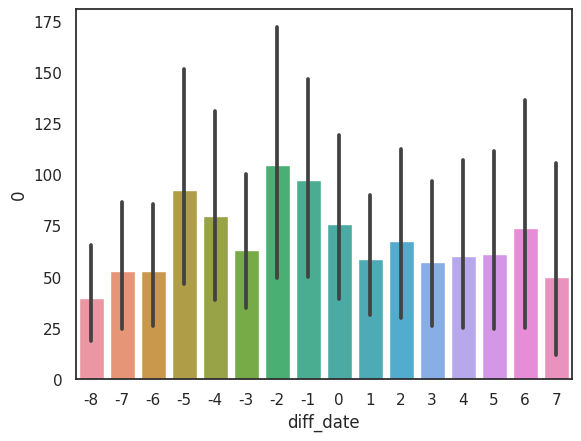

In [178]:
diff_date = tweets_iberifier.groupby(['fact_id', 'diff_date']).size().reset_index()[['diff_date', 0]]
sns.barplot(diff_date, x='diff_date', y=0)

In [203]:
tweets_iberifier

tweet_id                   fact_id  \
0      1631080654195572736  6409218c5966ae90e851a389   
1      1631079144543879174  6409218c5966ae90e851a389   
2      1631078102196535297  6409218c5966ae90e851a389   
3      1631070900580765699  6409218c5966ae90e851a389   
4      1631070104866762752  6409218c5966ae90e851a389   
...                    ...                       ...   
72662  1646074383000059904  642e0b8cf510dcaa70adbe42   
72663  1646039643379445761  642e0b8cf510dcaa70adbe42   
72664  1646016669238566912  642e0b8cf510dcaa70adbe42   
72665  1645958673821315074  642e0b8cf510dcaa70adbe42   
72666  1645945727028457472  642e0b8cf510dcaa70adbe42   

                                                    text  \
0      @wallstwolverine No s칠, aqu칤 hay mitad y mitad...   
1      @Chileokulto No voy a justificar nada! Hay un ...   
2      Son capaces de decir, a la vez, que la densida...   
3      游눛游밼25min Que hay que ver \nHermano @alexsanchez...   
4      NO HAY NI UNA SOLA VEZ QUE EL CARTEL DEL PP NO...   
...                                                  ...   
72662  @veintimillapier Como muchas otras mentiras y ...   
72663  餃쬜acron est치 de visita en los Pa칤ses Bajos, do...   
72664  En lugar de andar pagando para dar conciertos ...   
72665  Refugiado del gobierno de #Belgica, con estatu...   
72666  Macron proh칤be los pagos en efectivo de m치s de...   

                          db_id          date_tweet  retweet_count  \
0      6413ae166fa02fd2fb322358 2023-03-01 23:55:06              0   
1      6413ae166fa02fd2fb32235a 2023-03-01 23:49:06              0   
2      6413ae166fa02fd2fb32235c 2023-03-01 23:44:58              0   
3      6413ae166fa02fd2fb32235e 2023-03-01 23:16:21              0   
4      6413ae166fa02fd2fb322360 2023-03-01 23:13:11              1   
...                         ...                 ...            ...   
72662  6438983e6fa02fd2fb55c3f7 2023-04-12 08:54:50              0   
72663  6438983e6fa02fd2fb55c3f9 2023-04-12 06:36:47              0   
72664  6438983e6fa02fd2fb55c3fb 2023-04-12 05:05:30              3   
72665  6438983e6fa02fd2fb55c3fd 2023-04-12 01:15:02              0   
72666  6438983e6fa02fd2fb55c3ff 2023-04-12 00:23:36              1   

       tweet.public_metrics.reply_count  like_count  quote_count  \
0                                     0           0            0   
1                                     0           2            0   
2                                     1           7            0   
3                                     0           1            0   
4                                     0           1            0   
...                                 ...         ...          ...   
72662                                 0           1            0   
72663                                 1           1            0   
72664                                 3          11            0   
72665                                 0           0            0   
72666                                 1           1            0   

       impression_count  ... tweet.author.withheld.country_codes  \
0                    50  ...                                 NaN   
1                    43  ...                                 NaN   
2                   435  ...                                 NaN   
3                   414  ...                                 NaN   
4                     4  ...                                 NaN   
...                 ...  ...                                 ...   
72662                11  ...                                 NaN   
72663                67  ...                                 NaN   
72664               458  ...                                 NaN   
72665                 8  ...                                 NaN   
72666                57  ...                                 NaN   

      tweet.in_reply_to_user.withheld.country_codes     date_fact_check  \
0                                               NaN 2023-03-08 08:11:42 

<AxesSubplot: xlabel='impact', ylabel='0'>

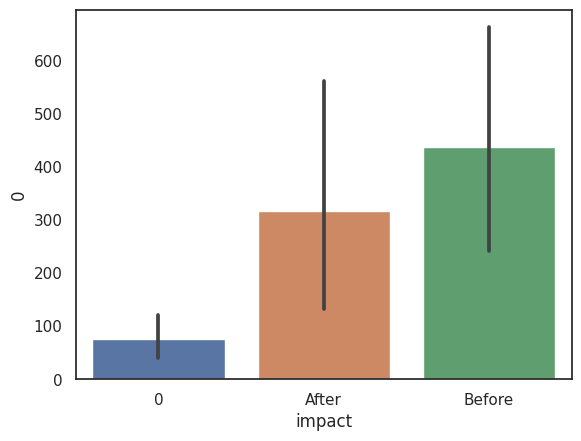

In [192]:
diff_date = tweets_iberifier.groupby(['fact_id', 'impact']).size().reset_index()[['impact', 0]]
sns.barplot(diff_date, x='impact', y=0)

In [204]:
fact_checker_size = tweets_iberifier.groupby(['fact-checker', 'date_tweet']).size().reset_index()
fact_checker_size = fact_checker_size.rename(columns={0: 'count'})